In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [24]:
%%time
data = pd.read_csv('/home/grzegorz/Pulpit/Projects/Airly/LDA/airly_data_full.csv')
data = data[['start_date', 'PM10', 'installation_id', 'Pressure', 'Temperature', 'air_quality_index_value']]
data.start_date = pd.to_datetime(data.start_date).reset_index(drop=True)
data = data.sort_values(by = 'start_date')
data = data.replace('None', np.nan)
dates = pd.date_range(start='2019-11-15T00:00:00Z', end='2020-01-16T23:00:00Z', freq='1H')
days = len(dates)
installations = data.installation_id.drop_duplicates().tolist()
inst = len(installations)
tmp = []
for installation in installations:
    df = {'start_date': dates, 'installation_id': np.repeat(installation, days)}
    tmp.append(pd.DataFrame(df))
tmp = pd.concat(tmp)
tmp = tmp.set_index(['start_date', 'installation_id'])
data = data.set_index(['start_date', 'installation_id'])
data = tmp.join(data, on = ['start_date', 'installation_id'], how='left')
data = data.reset_index(drop=False)
data.PM10 = data.PM10.astype(float)
data.Pressure = data.Pressure.astype(float)
data.Temperature = data.Temperature.astype(float)
data.air_quality_index_value = data.air_quality_index_value.astype(float)
tmp = []
for installation in installations:
    df = data[data.installation_id == installation]
    df = df.sort_values(by='start_date')
    df['PM10'] = df['PM10'].interpolate().interpolate(method='pad')
    df['Pressure'] = df['Pressure'].interpolate().interpolate(method='pad')
    df['Temperature'] = df['Temperature'].interpolate().interpolate(method='pad')
    df['air_quality_index_value'] = df['air_quality_index_value'].interpolate().interpolate(method='pad')
    tmp.append(df)
data = pd.concat(tmp)
ix = data.groupby('installation_id').count().sort_values(by='PM10')[data.groupby('installation_id').count().sort_values(by='PM10').PM10 > 1500].index.tolist()
data = data[data.installation_id.isin(ix)]
data = data[data.start_date > pd.to_datetime('2019-11-15T20:00:00Z')]
data = data.drop_duplicates()
data = data[data.start_date.isin(data[data.installation_id == 17].start_date.tolist())]
tmp = data.groupby('installation_id').count().sort_values(by = 'start_date').reset_index(drop=False)
tmp = tmp[tmp.start_date == 1491].installation_id.tolist()
data = data[data.installation_id.isin(tmp)]

CPU times: user 37.8 s, sys: 840 ms, total: 38.6 s
Wall time: 23.5 s


Text(0.5, 1.0, 'Recording station 2348')

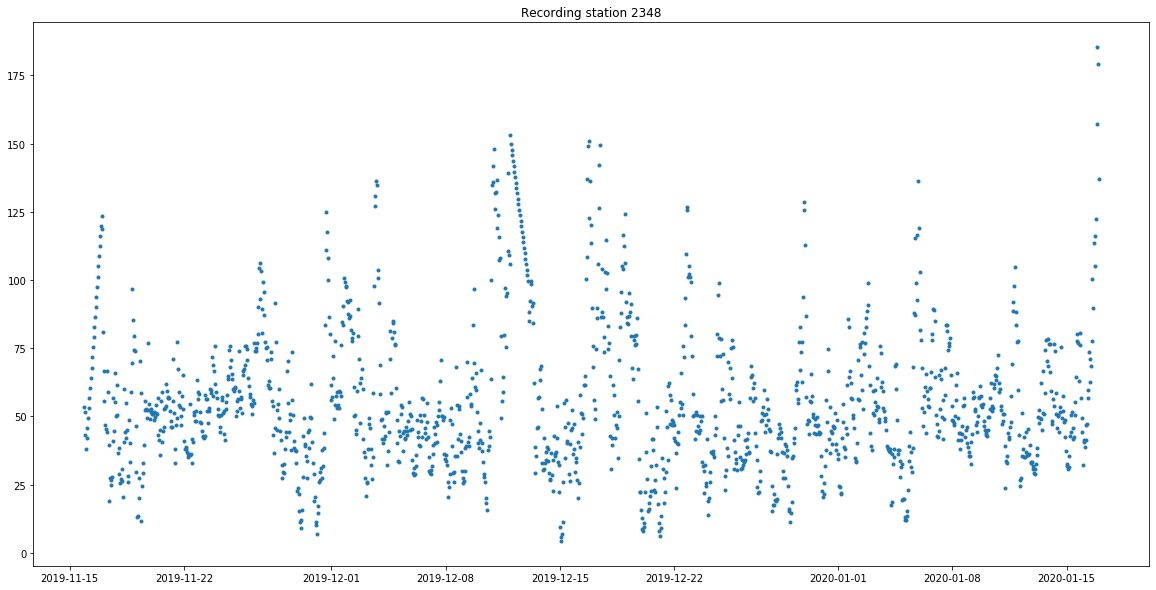

In [33]:
plt.rcParams['figure.figsize'] = 20, 10
plt.plot(data[data.installation_id == 2348].start_date, data[data.installation_id == 2348].air_quality_index_value, '.')
plt.title('Recording station 2348')